In [55]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [35]:
# provide the base path for project
base_path = r"D:\Taif\Insurance-Premium-Prediction"

In [79]:
# read data
data = pd.read_csv(os.path.join(base_path, r"data/raw/insurance.csv"))

In [37]:
data.shape

(1338, 7)

In [38]:
# display top 5 rows of data
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [41]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

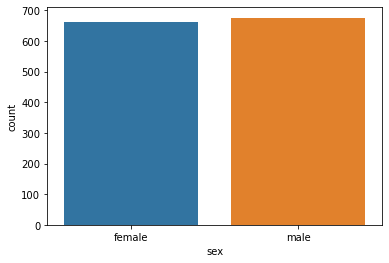

In [42]:
sns.countplot(data["sex"])

<AxesSubplot:xlabel='smoker', ylabel='count'>

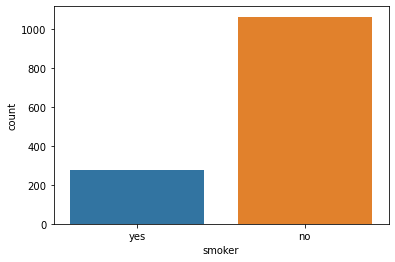

In [43]:
sns.countplot(data["smoker"])

<AxesSubplot:xlabel='region', ylabel='count'>

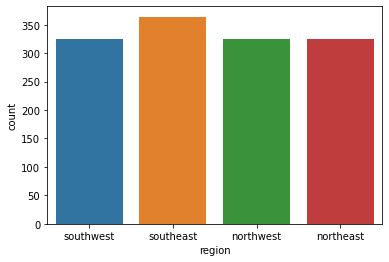

In [44]:
sns.countplot(data["region"])

<AxesSubplot:xlabel='region'>

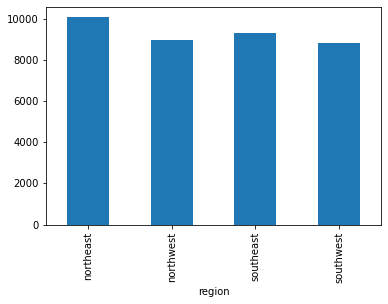

In [45]:
data.groupby("region")["expenses"].median().plot(kind="bar")

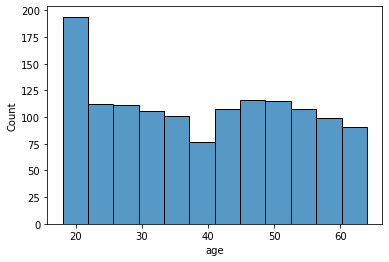

male      676
female    662
Name: sex, dtype: int64


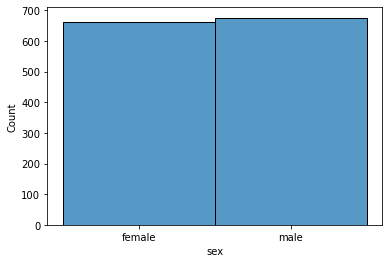

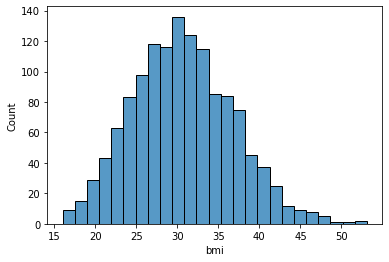

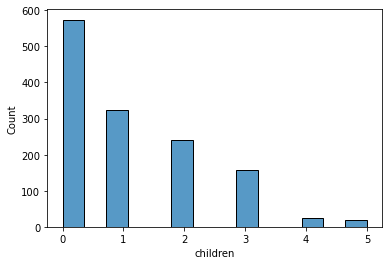

no     1064
yes     274
Name: smoker, dtype: int64


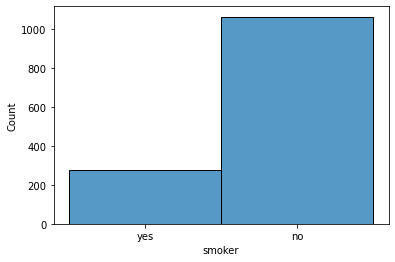

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


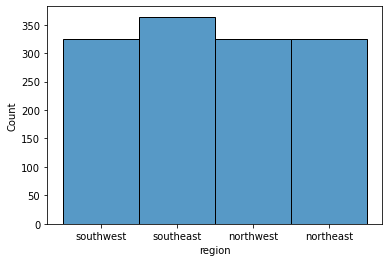

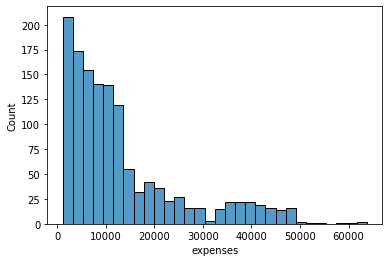

In [46]:
#plt.figure(figsize=(10,15))
cols = data.columns
for col in cols:
    sns.histplot(data=data[col])
    if data[col].dtype == 'object':
        print(data[col].value_counts())
    plt.show()

<AxesSubplot:>

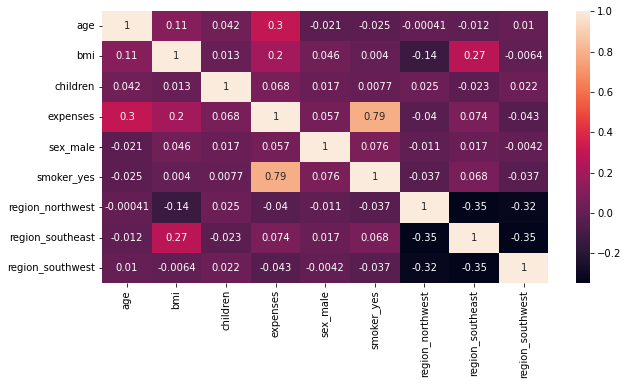

In [54]:
plt.figure(figsize=(10,5))
sns.heatmap(en_coded.corr(),annot=True)

In [80]:
age_bin = [17, 25, 40, 60, np.Inf]
lables = ['teenage', 'adult', 'midle age', 'old']

data['age_bin'] = pd.cut(data["age"], bins=age_bin, labels=lables)

<AxesSubplot:xlabel='age_bin'>

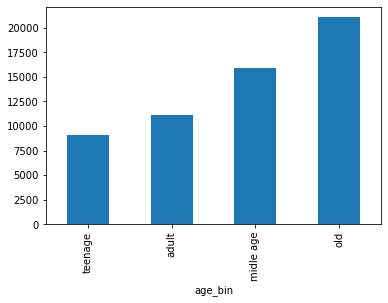

In [81]:
data.groupby("age_bin")["expenses"].mean().plot(kind="bar")

In [82]:
bmi_bin = [0, 18.5, 25, 30, np.Inf]
bmi_lable = ['underweight', 'healthy', 'overweight', 'obesity']
data['bmi_bin'] = pd.cut(data['bmi'], bins=bmi_bin, labels=bmi_lable)

<AxesSubplot:xlabel='bmi_bin'>

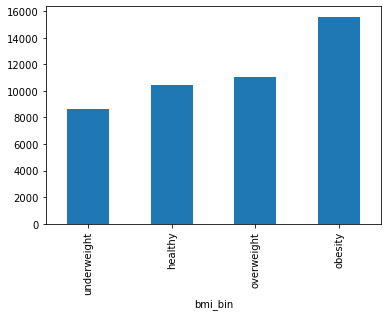

In [83]:
data.groupby("bmi_bin")["expenses"].mean().plot(kind="bar")

In [84]:
data.drop(axis=1, columns=['age', 'bmi'], inplace=True)

In [85]:
en_coded = pd.get_dummies(data, columns=['sex', 'smoker', 'region', 'age_bin', 'bmi_bin'])

In [86]:
en_coded

,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age_bin_teenage,age_bin_adult,age_bin_midle age,age_bin_old,bmi_bin_underweight,bmi_bin_healthy,bmi_bin_overweight,bmi_bin_obesity
0,0,16884.92,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
1,1,1725.55,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1
2,3,4449.46,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0,21984.47,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,3866.86,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,3,10600.55,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1334,0,2205.98,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
1335,0,1629.83,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
1336,0,2007.95,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0
